In [ ]:
import os
import pandas as pd
import numpy as np
import cv2
import csv
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras import backend as K
from keras.models import model_from_json,load_model

from keras.metrics import Precision
from keras.metrics import Recall

from sklearn.preprocessing import MinMaxScaler
from google.colab import drive


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMG_HEIGHT=256
IMG_WIDTH=256
IMG_CHANNELS=3

In [ ]:
folder_path=os.path.join(os.getcwd(),'drive','MyDrive','Colab Notebooks','datasets','UCMerced_LandUse','Images')
X_train=list()
X_test=list()
y_train=list()
y_test=list()
target=dict()

count=0
for i in os.listdir(folder_path):
    target[i]=count
    count=count+1


In [ ]:
val=1
train_data=list()
target_data=list()

for directory in os.listdir(folder_path):
    temp_folder=os.path.join(folder_path,directory)
    list_files=os.listdir(temp_folder)
    for i in range(0,len(list_files)):
        temp_path=os.path.join(temp_folder,list_files[i])
        train_data.append(temp_path)
        target_data.append([target[directory]])

In [ ]:
from tqdm import tqdm_notebook, tnrange

X=list()
y=list()

for n,val in tqdm_notebook(enumerate(train_data), total=len(train_data)):
  img = cv2.imread(train_data[n])
  img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
  X.append(img)
  
X=np.array(X)
y=np.array(target_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, random_state=42, test_size = 0.2 )

y_train_backup=np.array(y_train)
y_valid_backup=np.array(y_valid)

print(X_train.shape)
print(y_train.shape)


(1680, 256, 256, 3)
(1680, 1)


Data Normalization

In [ ]:
from keras.utils import normalize, to_categorical

X_train = X_train/255.0
X_valid = X_valid/255.0

y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)


In [ ]:
activation = 'sigmoid'
feature_extractor = Sequential()
feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS)))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization()) 
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Conv2D(128, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(128, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization()) 
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Conv2D(256, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(256, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization()) 
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Conv2D(512, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(512, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization()) 
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Flatten())

x=feature_extractor.output
x=Dense(128, activation = activation, kernel_initializer = 'he_uniform')(x)
x=Dense(64, activation = activation, kernel_initializer = 'he_uniform')(x)
prediction_layer=Dense(21, activation = 'softmax')(x)

#Constructing CNN Model
cnn_model=Model(inputs=feature_extractor.input,outputs=prediction_layer)
cnn_model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(cnn_model.summary()) 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      18496 

In [ ]:
!pip install ipython-autotime

%load_ext autotime

time: 146 µs (started: 2021-05-10 03:47:07 +00:00)


In [ ]:
history = cnn_model.fit(X_train, y_train, epochs=250, validation_data = (X_valid, y_valid))

Epoch 1/250
53/53 [==============================] - 26s 126ms/step - loss: 3.0485 - accuracy: 0.0834 - val_loss: 3.1461 - val_accuracy: 0.0476
Epoch 2/250
53/53 [==============================] - 5s 90ms/step - loss: 2.8363 - accuracy: 0.1498 - val_loss: 3.0947 - val_accuracy: 0.0548
Epoch 3/250
53/53 [==============================] - 5s 90ms/step - loss: 2.7691 - accuracy: 0.1705 - val_loss: 3.1761 - val_accuracy: 0.0452
Epoch 4/250
53/53 [==============================] - 5s 90ms/step - loss: 2.6135 - accuracy: 0.2099 - val_loss: 3.4019 - val_accuracy: 0.0452
Epoch 5/250
53/53 [==============================] - 5s 90ms/step - loss: 2.5764 - accuracy: 0.2060 - val_loss: 3.1751 - val_accuracy: 0.1071
Epoch 6/250
53/53 [==============================] - 5s 90ms/step - loss: 2.4313 - accuracy: 0.2803 - val_loss: 3.5471 - val_accuracy: 0.0524
Epoch 7/250
53/53 [==============================] - 5s 90ms/step - loss: 2.3422 - accuracy: 0.3044 - val_loss: 3.6463 - val_accuracy: 0.0476
Epoc

In [ ]:
cnn_model.save(os.path.join(os.getcwd(),'model-landuse-4a-cnn.h5'))

time: 179 ms (started: 2021-05-10 04:07:25 +00:00)


In [ ]:
feature_extractor.save(os.path.join(os.getcwd(),'model-landuse-4-feature-extractor.h5'))

time: 75.9 ms (started: 2021-05-10 04:07:25 +00:00)


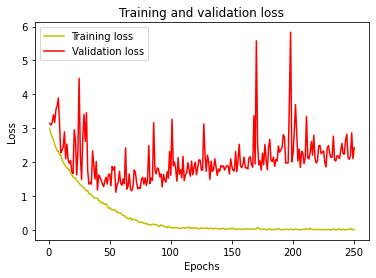

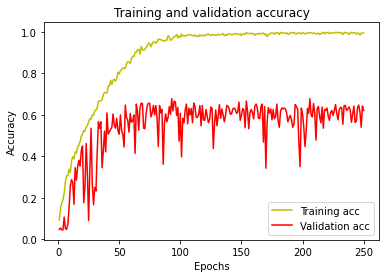

time: 378 ms (started: 2021-05-10 04:07:25 +00:00)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
print(y_train_backup.shape)

(1680, 1)
time: 2.09 ms (started: 2021-05-10 04:07:26 +00:00)


In [ ]:
#Creating input for the random forest model
feature_extractor=load_model('model-landuse-4-feature-extractor.h5')
X_random_forest = feature_extractor.predict(X_train)

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)

time: 2.75 s (started: 2021-05-10 04:07:26 +00:00)


In [ ]:
rf_model.fit(X_random_forest, y_train_backup)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

time: 12.6 s (started: 2021-05-10 04:07:29 +00:00)


In [ ]:
import joblib

joblib.dump(rf_model,os.path.join(os.getcwd(),'model-landuse-4b-rn.joblib'))

rf_model=joblib.load("model-landuse-4b-rn.joblib")

X_test_feature = feature_extractor.predict(X_valid)
#Now predict using the trained RF model. 
prediction_RF = rf_model.predict(X_test_feature)


10
time: 728 ms (started: 2021-05-10 04:07:41 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print('Accuracy:', accuracy_score(y_valid_backup,prediction_RF))
print('Precision:', precision_score(y_valid_backup,prediction_RF,average='weighted'))
print('Recall:', recall_score(y_valid_backup,prediction_RF,average='weighted'))
print('F1 score:', f1_score(y_valid_backup,prediction_RF,average='weighted'))

Accuracy: 0.6
Precision: 0.5988459592482148
Recall: 0.6
F1 score: 0.5904202439283837
time: 13.9 ms (started: 2021-05-10 04:17:05 +00:00)


In [ ]:
y_train_pred=rf_model.predict(X_random_forest)

time: 135 ms (started: 2021-05-10 04:23:18 +00:00)


In [ ]:
print('Accuracy:', accuracy_score(y_train_backup,y_train_pred))
print('Precision:', precision_score(y_valid_backup,prediction_RF,average='weighted'))
print('Recall:', recall_score(y_valid_backup,prediction_RF,average='weighted'))
print('F1 score:', f1_score(y_valid_backup,prediction_RF,average='weighted'))

Accuracy: 1.0
Precision: 0.5988459592482148
Recall: 0.6
F1 score: 0.5904202439283837
time: 10.2 ms (started: 2021-05-10 04:24:11 +00:00)


In [ ]:
from tqdm import tqdm_notebook, tnrange

X=list()
y=list()

for n,val in tqdm_notebook(enumerate(train_data), total=len(train_data)):
  img = cv2.imread(train_data[n])
  img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
  X.append(img)
  
X=np.array(X)
y=np.array(target_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



time: 6.03 s (started: 2021-05-10 04:41:07 +00:00)


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, random_state=42, test_size = 0.2 )

y_train_backup=np.array(y_train)
y_valid_backup=np.array(y_valid)

print(X_train.shape)
print(y_train.shape)


(1680, 256, 256, 3)
(1680, 1)
time: 97.2 ms (started: 2021-05-10 04:41:45 +00:00)


In [ ]:
from keras.utils import normalize, to_categorical

X_train = X_train/255.0
X_valid = X_valid/255.0

y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)

time: 563 ms (started: 2021-05-10 04:42:37 +00:00)


In [ ]:
cnn_model=load_model('model-landuse-4a-cnn.h5')

time: 395 ms (started: 2021-05-10 04:44:35 +00:00)


In [ ]:
y_train_pred=cnn_model.predict(X_train)
y_train_pred=np.argmax(y_train_pred,axis=-1)
print(y_train_pred)

y_valid_pred=cnn_model.predict(X_valid)
y_valid_pred=np.argmax(y_valid_pred,axis=-1)
print(y_valid_pred)

In [ ]:
print(y_train_pred.shape)
print(y_valid_pred.shape)

(1680,)
(420,)
time: 1.55 ms (started: 2021-05-10 04:48:23 +00:00)


In [ ]:
y_train=np.argmax(y_train,axis=-1)
y_valid=np.argmax(y_valid,axis=-1)

print(y_train.shape)
print(y_valid.shape)

(1680,)
(420,)
time: 2.45 ms (started: 2021-05-10 04:49:22 +00:00)


In [ ]:
print('Accuracy:', accuracy_score(y_train,y_train_pred))
print('Precision:', precision_score(y_train,y_train_pred,average='weighted'))
print('Recall:', recall_score(y_train,y_train_pred,average='weighted'))
print('F1 score:', f1_score(y_train,y_train_pred,average='weighted'))

Accuracy: 0.9809523809523809
Precision: 0.9821156881243172
Recall: 0.9809523809523809
F1 score: 0.9810343015046826
time: 11.3 ms (started: 2021-05-10 04:51:08 +00:00)


In [ ]:
print('Accuracy:', accuracy_score(y_valid,y_valid_pred))
print('Precision:', precision_score(y_valid,y_valid_pred,average='weighted'))
print('Recall:', recall_score(y_valid,y_valid_pred,average='weighted'))
print('F1 score:', f1_score(y_valid,y_valid_pred,average='weighted'))

Accuracy: 0.6214285714285714
Precision: 0.6329367360054532
Recall: 0.6214285714285714
F1 score: 0.6196154893072767
time: 10.4 ms (started: 2021-05-10 04:52:07 +00:00)
